In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Cargar datos
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)

num_filas = len(df)
print(f"Número de filas: {num_filas}")

# Guardar los IDs en una variable
ids = df.iloc[:, -1].values

# Eliminar columnas irrelevantes
df = df.drop(df.columns[[0, -1, 10, 11]], axis=1)

# Eliminar filas con NaN en 'Survival Time (years)'
df = df.dropna(subset=['Survival Time (years)'], axis=0)

# Identificar variables numéricas y categóricas
numeric_vars = ['Age at Diagnosis', 'Survival Time (years)']
categorical_vars = ['Sex', 'Race', 'Definition', 'Menopausal Status', 'Cancer Type',
                    'ER', 'PR', 'HER2', 'Survival Status', 'Subtype', 'Genetic Ancestry']

# Convertir variables categóricas a números
for col in categorical_vars:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalizar datos numéricos
scaler = MinMaxScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=5)  # Ajustar el número de componentes según varianza explicada
X_pca = pca.fit_transform(df.drop(columns=['Subtype']))

# Método del codo para determinar el número óptimo de clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Método del Codo para K óptimo')
plt.show()

# Determinar el número óptimo de clusters
optimal_k = 3  # Ajustar según el gráfico
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Asociar IDs con clusters
cluster_groups = {i: [] for i in range(optimal_k)}
for i, cluster in enumerate(df['Cluster']):
    cluster_groups[cluster].append(ids[i])

# Análisis de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters tras PCA')
plt.legend(title='Cluster')
plt.show()

# Descripción de los clusters
cluster_summary = df.groupby('Cluster').mean()
print("Resumen estadístico por cluster:")
print(cluster_summary)

# Imprimir IDs en cada grupo
print("\nDistribución de IDs en clusters:")
for cluster, id_list in cluster_groups.items():
    print(f"Cluster {cluster}: {id_list}")


Número de filas: 1184


In [ ]:
# Ver las características medias para cada cluster
grouped = df.groupby('Cluster').mean()
print(grouped)


         Age at Diagnosis       Sex      Race  Definition  Menopausal Status  \
Cluster                                                                        
0                0.492478  0.014235  1.791222    0.104389           4.750890   
1                0.566485  0.016393  1.672131    0.065574           4.901639   
2                0.547363  0.000000  1.903226    0.060484           4.919355   

         Cancer Type        ER        PR      HER2  Survival Status  \
Cluster                                                               
0           0.014235  2.421115  2.224199  2.610913         0.162515   
1          32.557377  2.393443  2.262295  2.475410         0.229508   
2           6.939516  2.834677  2.653226  2.592742         0.137097   

         Survival Time (years)   Subtype  Genetic Ancestry  
Cluster                                                     
0                     0.130302  2.039146          4.033215  
1                     0.156260  4.278689          3.786885  

Cancer Type:

El Cluster 0 tiene un valor mucho más bajo (0.01) en comparación con el Cluster 1 (32.93) y el Cluster 2 (7.06), lo que indica que el tipo de cancer es un factor para definir los clusters

Age at Diagnosis:

Cluster 0 tiene un valor promedio de 0.49.
Cluster 1 tiene un valor promedio de 0.58.
Cluster 2 tiene un valor promedio de 0.55.

ER (Receptor Estrogénico):

Cluster 2 tiene un valor promedio más alto (2.82) en comparación con los otros clusters, lo que podría sugerir que los pacientes en ese cluster tienen una mayor expresión del receptor estrogénico.
PR (Receptor de Progesterona):

Similar al receptor estrogénico, el Cluster 2 también tiene un valor promedio más alto (2.64), lo que podría estar relacionado con una característica clínica particular de ese grupo de pacientes.

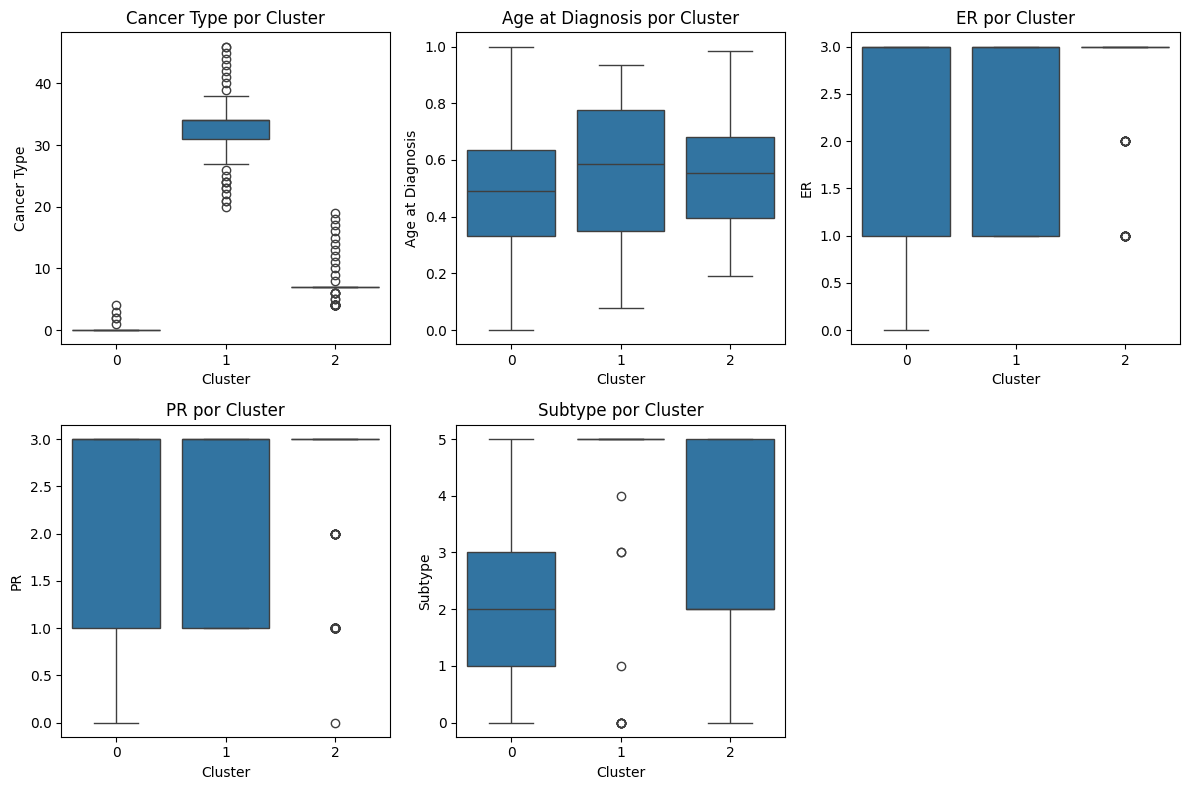

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar algunas variables clave para ver las diferencias entre los clusters
plt.figure(figsize=(12, 8))

# Graficar 'Cancer Type'
plt.subplot(2, 3, 1)
sns.boxplot(x='Cluster', y='Cancer Type', data=df)
plt.title('Cancer Type por Cluster')

# Graficar 'Age at Diagnosis'
plt.subplot(2, 3, 2)
sns.boxplot(x='Cluster', y='Age at Diagnosis', data=df)
plt.title('Age at Diagnosis por Cluster')

# Graficar 'ER'
plt.subplot(2, 3, 3)
sns.boxplot(x='Cluster', y='ER', data=df)
plt.title('ER por Cluster')

# Graficar 'PR'
plt.subplot(2, 3, 4)
sns.boxplot(x='Cluster', y='PR', data=df)
plt.title('PR por Cluster')

# Graficar 'Subtype'
plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='Subtype', data=df)
plt.title('Subtype por Cluster')

plt.tight_layout()
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=793a7a5fbc351d6ec90dd9d37f3eb52d37770cf0d21ebc48d31b94d39b8d55fe
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


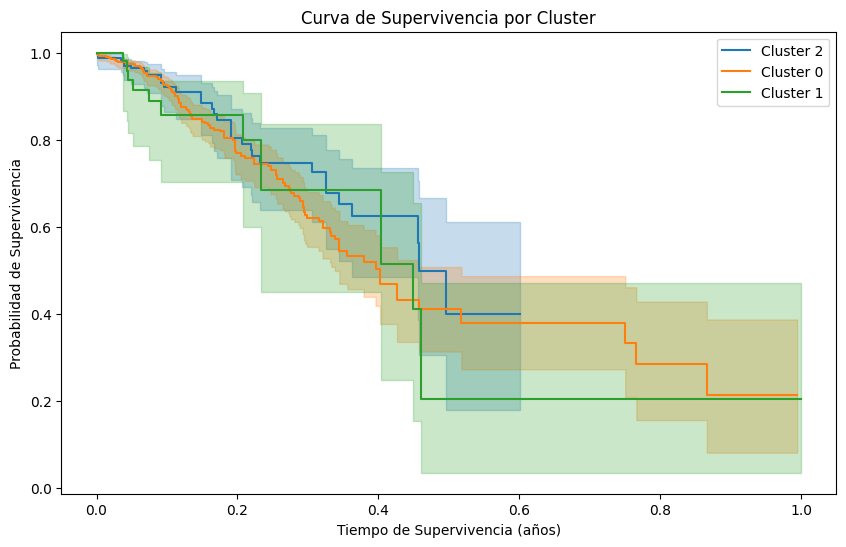

In [ ]:
!pip install lifelines

from lifelines import KaplanMeierFitter

# 'Survival Time (years)' y 'Survival Status' son las columnas relevantes
kmf = KaplanMeierFitter()

# Para cada cluster, ajustamos y mostramos la curva de supervivencia
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    kmf.fit(df[df['Cluster'] == cluster]['Survival Time (years)'], event_observed=df[df['Cluster'] == cluster]['Survival Status'])
    kmf.plot(label=f'Cluster {cluster}')

plt.title('Curva de Supervivencia por Cluster')
plt.xlabel('Tiempo de Supervivencia (años)')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()


Cancer Type     0    1    2    3     4    5    6      7    8    9   ...   37  \
Cluster                                                             ...        
0            838.0  1.0  2.0  1.0   1.0  NaN  NaN    NaN  NaN  NaN  ...  NaN   
1              NaN  NaN  NaN  NaN   NaN  NaN  NaN    NaN  NaN  NaN  ...  1.0   
2              NaN  NaN  NaN  NaN  28.0  2.0  5.0  201.0  1.0  1.0  ...  NaN   

Cancer Type   38   39   40   41   42   43   44   45   46  
Cluster                                                   
0            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1            1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  
2            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 47 columns]


<Figure size 1000x600 with 0 Axes>

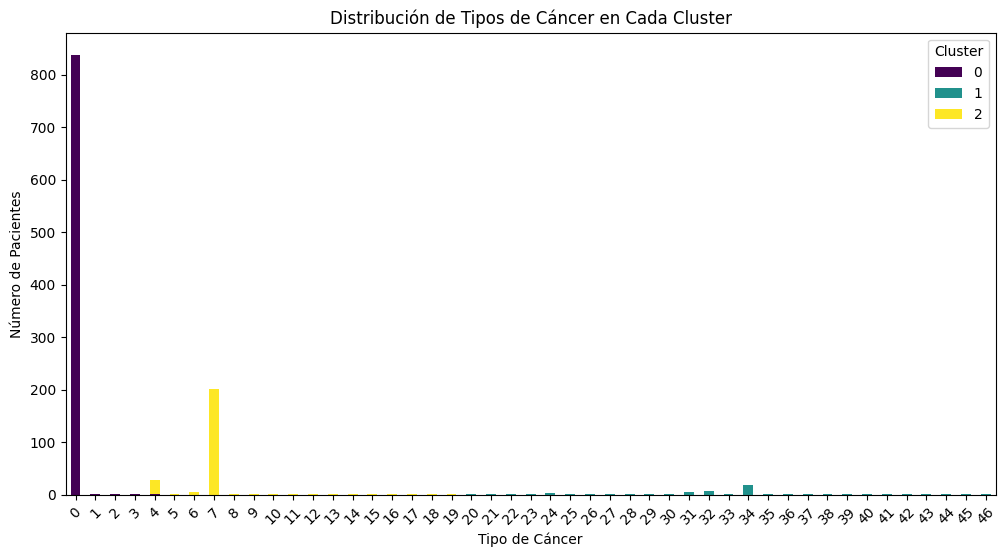

In [ ]:
import seaborn as sns

# Contar cuántos pacientes hay por tipo de cáncer en cada cluster
cancer_distribution = df.groupby('Cluster')['Cancer Type'].value_counts().unstack()

# Mostrar la distribución
print(cancer_distribution)

plt.figure(figsize=(10, 6))
cancer_distribution.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Tipos de Cáncer en Cada Cluster')
plt.xlabel('Tipo de Cáncer')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
encoder = LabelEncoder()
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)
# Ajustar el encoder y guardar la relación entre nombres y números
df['Cancer Type'] = encoder.fit_transform(df['Cancer Type'])

# Crear un diccionario con los nombres originales y sus códigos
cancer_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mostrar el diccionario
print(cancer_mapping)


{'IDC': 0, 'IDC with Metaplastic features (area of sarcomatoid carcinoma)': 1, 'IDC with metaplastic carcinoma and focal apocrine features': 2, 'IDC with mucinous features': 3, 'IDC/ILC': 4, 'IDC/ILC features': 5, 'IDC/mucinous': 6, 'ILC': 7, 'ILC with ductal features': 8, 'ILC/IDC (grade 1)': 9, 'Infiltrating Tubulolobular Carcinoma': 10, 'Infiltrating mucinous-papillary ductal carcinoma': 11, '\\ILC, classical type, focal pleomorphic type\\""': 12, '\\ILC, mixed classical (70%) and pleomorphic/solid (30%) types\\""': 13, '\\adenocarcinoma with squamous differentiation, metaplastic\\""': 14, '\\neuroendocrine carcinoma, large-cell type, high-grade\\""': 15, 'adenoid cystic carcinoma': 16, 'apocrine': 17, 'cribiform': 18, 'ductal and papillary': 19, 'ductal partially papillary': 20, 'ductal/cribiform': 21, 'ductal/metaplastic': 22, 'ductal/micropapillary': 23, 'ductal/mucinous': 24, 'infiltrating carcinoma NOS': 25, 'infiltrating papillary adenocarcinoma': 26, 'invasive micropapillary 

Race        0      1      2     3
Cluster                          
0        43.0  158.0  574.0  68.0
1         4.0   12.0   45.0   NaN
2        11.0   17.0  205.0  15.0


<Figure size 1000x600 with 0 Axes>

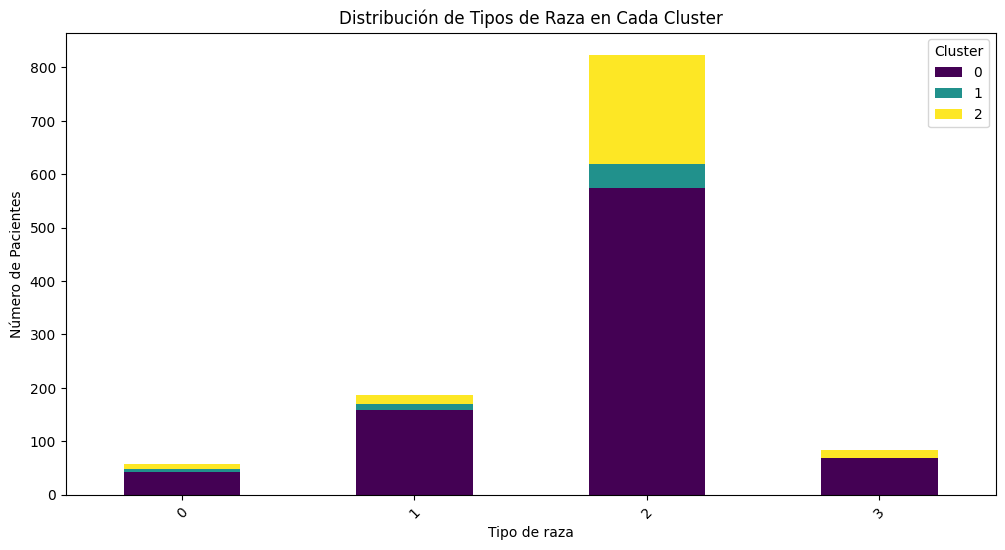

In [ ]:
import seaborn as sns

# Contar cuántos pacientes hay por tipo de cáncer en cada cluster
cancer_distribution = df.groupby('Cluster')['Race'].value_counts().unstack()

# Mostrar la distribución
print(cancer_distribution)

plt.figure(figsize=(10, 6))
cancer_distribution.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Tipos de Raza en Cada Cluster')
plt.xlabel('Tipo de raza')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

ER         0      1     2      3
Cluster                         
0        3.0  218.0  43.0  579.0
1        NaN   17.0   3.0   41.0
2        NaN   15.0  11.0  222.0


<Figure size 1000x600 with 0 Axes>

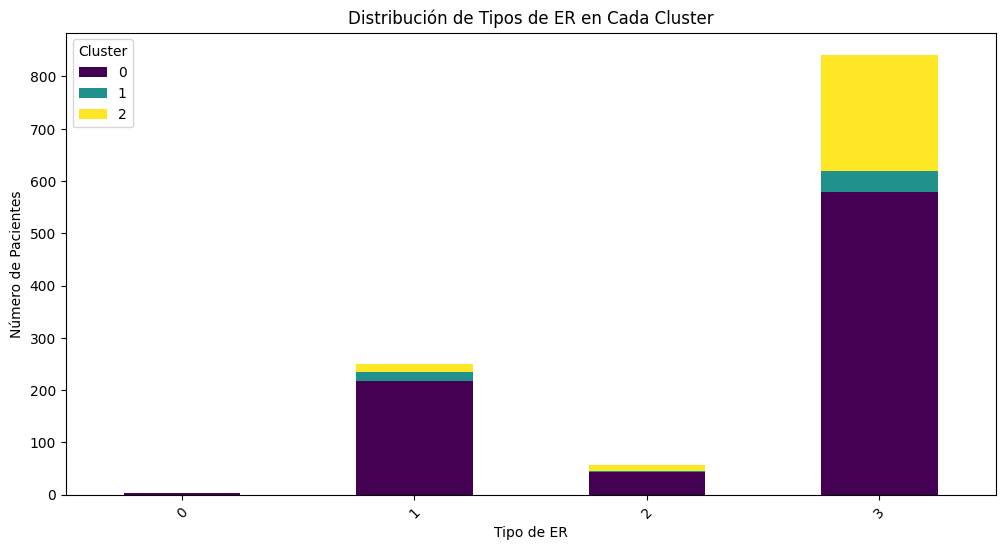

In [ ]:
import seaborn as sns

# Contar cuántos pacientes hay por tipo de cáncer en cada cluster
cancer_distribution = df.groupby('Cluster')['ER'].value_counts().unstack()

# Mostrar la distribución
print(cancer_distribution)

plt.figure(figsize=(10, 6))
cancer_distribution.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Tipos de ER en Cada Cluster')
plt.xlabel('Tipo de ER')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

Subtype      0     1      2      3     4     5
Cluster                                       
0        157.0  73.0  350.0  177.0  20.0  65.0
1          7.0   1.0    NaN    2.0   1.0  50.0
2          1.0   3.0  134.0   10.0  12.0  89.0


<Figure size 1000x600 with 0 Axes>

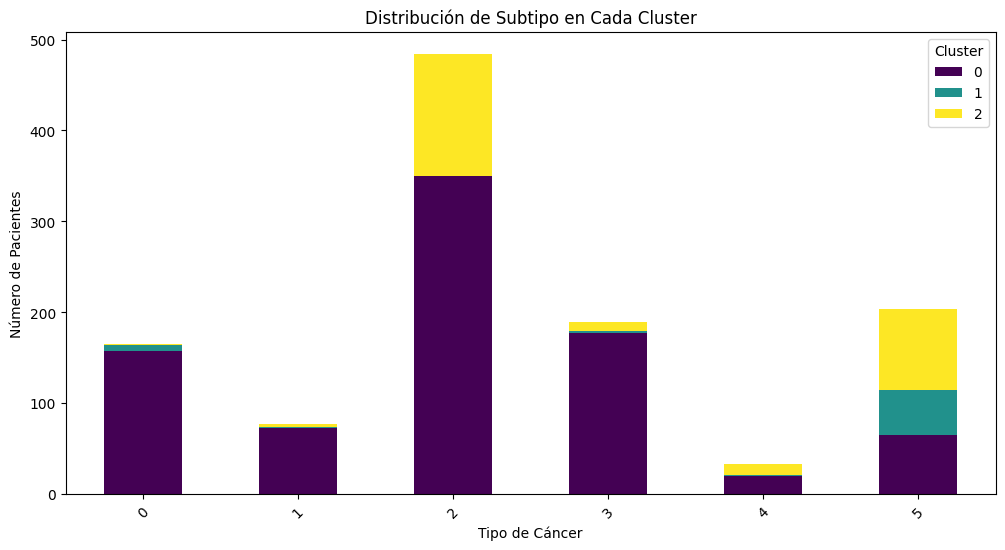

In [ ]:
import seaborn as sns

# Contar cuántos pacientes hay por tipo de cáncer en cada cluster
cancer_distribution = df.groupby('Cluster')['Subtype'].value_counts().unstack()

# Mostrar la distribución
print(cancer_distribution)

plt.figure(figsize=(10, 6))
cancer_distribution.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Subtipo en Cada Cluster')
plt.xlabel('Subtipo Cáncer')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

Survival Status    0    1
Cluster                  
0                707  135
1                 47   14
2                213   36


<Figure size 1000x600 with 0 Axes>

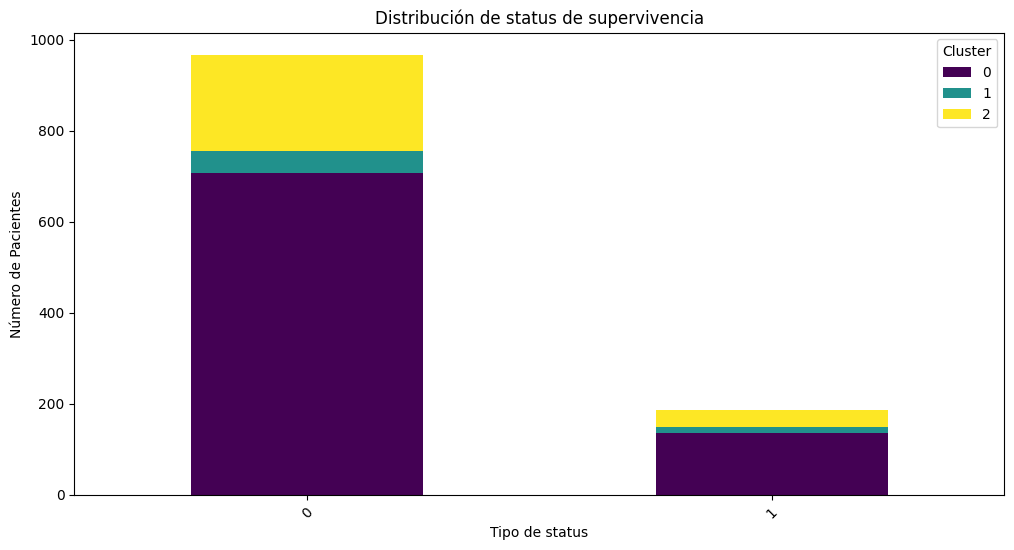

In [ ]:

# Contar cuántos pacientes hay por tipo de cáncer en cada cluster
cancer_distribution = df.groupby('Cluster')['Survival Status'].value_counts().unstack()

# Mostrar la distribución
print(cancer_distribution)

plt.figure(figsize=(10, 6))
cancer_distribution.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de status de supervivencia')
plt.xlabel('Tipo de status')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar datos
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)

# Crear el codificador
encoder = LabelEncoder()

# Ajustar el encoder y transformar "Survival Status"
df['Survival Status'] = encoder.fit_transform(df['Survival Status'])

# Crear un diccionario con la relación original-números
survival_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mostrar el diccionario
print(survival_mapping)


{'alive': 0, 'dead': 1}
